In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
import matplotlib.patches as mpatches
from scipy import stats

import re
import copy

In [4]:
prStatusByCounry = pd.read_csv("StatusByCountry.csv")

In [5]:
prStatusByCounrySample = prStatusByCounry.sample(frac=1)
prStatusByCounrySample

,name,prostitutionStatus,pop2019
40,Guyana,Illegal,782.766
80,Saudi Arabia,Illegal,34268.528
88,Suriname,Illegal,581.372
18,Chile,Legal,18952.038
78,Saint Lucia,Illegal,182.790
...,...,...,...
49,Ireland,Limitedly legal,4882.495
0,Afghanistan,Illegal,38041.754
32,Estonia,Legal,1325.648
70,Paraguay,Legal,7044.636


In [6]:
prNumberByCounry = pd.read_csv("ProstitutesNumber.csv")

In [7]:
prNumberByCounrySample = prNumberByCounry.sample(frac=1)
prNumberByCounrySample

,Country,Number of prostitutesSource: UNAIDS 2016Sex Workers: Size Estimates[4],Number of prostitutesOther sources and year,Population[5],"Prevalence(prostitutes per10,000 population)"
135,Serbia,"3,900",NaN,"8,820,083",4
69,India,"660,000",NaN,"1,324,171,354",5
62,Guatemala,"26,000",NaN,"16,582,469",16
129,Russia,NaN,"3,000,000 (2006)[25]","143,964,513",208
70,Indonesia,"230,000",NaN,"261,115,456",9
...,...,...,...,...,...
64,Guinea-Bissau,"3,100",NaN,"1,815,698",17
21,Bulgaria,"10,000",NaN,"7,131,494",14
19,Botswana,"4,200",NaN,"2,250,260",19
148,Suriname,"2,200",NaN,"558,368",39


In [8]:
prostitutesPer10K = []
for i in prStatusByCounry["name"]:
    prostitutesPer10K.append("")
print(len(prostitutesPer10K))

100


In [9]:
for i in range(len(prNumberByCounry["Country"])):
    if prNumberByCounry["Country"][i] in list(prStatusByCounry["name"]):
        index = prStatusByCounry.loc[prStatusByCounry['name']== prNumberByCounry["Country"][i]].index[0]
        prostitutesPer10K[index] = prNumberByCounry["Prevalence(prostitutes per10,000 population)"][i]
print(prostitutesPer10K)

['4', '17 - 103', '12', '75', '18', '17', '9', '34', '78', '9', '', '23', '', '29', '26', '14', '22', '-', '-', '14 - 32', '2', '31', '50', '78', '-', '12', '11', '', '56 - 94', '21', '2', '32', '7', '2', '7', '5', '37', '9 - 13', '', '16', '69', '65', '25', '21 - 26', '', '5', '9', '11', '-', '2', '15', '10', '66', '-', '-', '27', '12', '150', '2', '3 - 10', '5', '7', '', '19', '15', '13', '29', '10', '6', '13', '5', '21', '15', '5', '27', '80', '10', '', '', '', '-', '14', '-', '40', '140', '4', '98 - 197', '15', '39', '3', '24', '22', '7.3', '13+', '-', '32', '11', '31', '24', '150']


In [10]:
def makeInt(i):
    return int(i)

def takeSum(i):
    splitedList = i.split("-")
    intedList = list(map(makeInt, splitedList))
    return str(round(sum(intedList)/2))

for i in range(len(prostitutesPer10K)):
    if len(prostitutesPer10K[i]) > 3:
        prostitutesPer10K[i] = takeSum(prostitutesPer10K[i])
    if prostitutesPer10K[i] == '13+':
        prostitutesPer10K[i] = '13'
    if prostitutesPer10K[i] == '7.3':
        prostitutesPer10K[i] = '7' 
    if prostitutesPer10K[i] == '' or prostitutesPer10K[i] == '-':
        prostitutesPer10K[i] = 'None'     
print(prostitutesPer10K) 
print(len(prostitutesPer10K))

['4', '60', '12', '75', '18', '17', '9', '34', '78', '9', 'None', '23', 'None', '29', '26', '14', '22', 'None', 'None', '23', '2', '31', '50', '78', 'None', '12', '11', 'None', '75', '21', '2', '32', '7', '2', '7', '5', '37', '11', 'None', '16', '69', '65', '25', '24', 'None', '5', '9', '11', 'None', '2', '15', '10', '66', 'None', 'None', '27', '12', '150', '2', '6', '5', '7', 'None', '19', '15', '13', '29', '10', '6', '13', '5', '21', '15', '5', '27', '80', '10', 'None', 'None', 'None', 'None', '14', 'None', '40', '140', '4', '148', '15', '39', '3', '24', '22', '7', '13', 'None', '32', '11', '31', '24', '150']
100


In [11]:
prStatusByCounry["prostitutesPer10K"] = prostitutesPer10K

In [12]:
prStatusByCounry.rename(columns={'name': 'country', 'pop2019': 'population'}, inplace=True)

In [13]:
prStatusByCounry

,country,prostitutionStatus,population,prostitutesPer10K
0,Afghanistan,Illegal,38041.754,4
1,Albania,Illegal,2880.917,60
2,Angola,Illegal,31825.295,12
3,Antigua and Barbuda,Illegal,97.118,75
4,Argentina,Legal,44780.677,18
...,...,...,...,...
95,United Arab Emirates,Illegal,9770.529,32
96,United Kingdom,Limitedly legal,67530.172,11
97,United States,Limitedly legal,329064.917,31
98,Uruguay,Legal,3461.734,24


In [14]:
prostitutionStatus = ['Illegal', 'Illegal', 'Illegal', 'Illegal', 'Legality varies with local laws', 'Illegal', 
                      'Legality varies with local law', 'Legal', 'Illegal', 'Legal', 'Illegal', 'Abolitionism', 
                      'Neo-abolitionism', 'Legal', 'Abolitionism', 'Abolitionism', 'Illegal', 'Neo-abolitionism', 
                      'Legal', 'Illegal', 'Legal', 'Abolitionism', 'Illegal', 'Abolitionism', 
                      'Legality varies with local laws', 'Abolitionism', 'Abolitionism', 'Illegal', 'Abolitionism', 'Legal', 
                      'Illegal', 'Legality varies with local laws', 'Abolitionism', 'Abolitionism', 'Abolitionism', 'Neo-abolitionism', 
                      'Legal', 'Legal', 'Illegal', 'Abolitionism', 'Illegal', 'Illegal', 
                      'Abolitionism', 'Legal', 'Neo-abolitionism', 'Abolitionism', 'Legality varies with local laws', 'Illegal', 
                      'Illegal', 'Neo-abolitionism', 'Abolitionism', 'Abolitionism', 'Illegal', 'Illegal', 
                      'Illegal', 'Legality varies with local laws', 'Abolitionism', 'Legal', 'Illegal', 'Illegal', 
                      'Legal', 'Abolitionism', 'Abolitionism', 'Legality varies with local laws', 'Legal', 'Decriminalization', 
                      'Abolitionism', 'Illegal', 'Neo-abolitionism', 'Legal', 'Abolitionism', 'Legal', 
                      'Illegal', 'Abolitionism', 'Abolitionism', 'Illegal', 'Illegal', 'Illegal', 
                      'Illegal', 'Illegal', 'Illegal', 'Legal', 'Legality varies with local laws', 'Abolitionism', 
                      'Abolitionism', 'Illegal', 'Illegal', 'Abolitionism', 'Illegal', 'Neo-abolitionism', 
                      'Legal', 'Illegal', 'Illegal', 'Legal', 'Illegal', 'Illegal', 
                      'Abolitionism', 'Illegal', 'Legal', 'Legal']

In [15]:
prStatusByCounry["prostitutionStatus"] = prostitutionStatus

In [16]:
prStatusByCounry

,country,prostitutionStatus,population,prostitutesPer10K
0,Afghanistan,Illegal,38041.754,4
1,Albania,Illegal,2880.917,60
2,Angola,Illegal,31825.295,12
3,Antigua and Barbuda,Illegal,97.118,75
4,Argentina,Legality varies with local laws,44780.677,18
...,...,...,...,...
95,United Arab Emirates,Illegal,9770.529,32
96,United Kingdom,Abolitionism,67530.172,11
97,United States,Illegal,329064.917,31
98,Uruguay,Legal,3461.734,24


In [17]:
counriesInfo = pd.read_excel("CountriesWorld.xls")

In [18]:
counriesInfo

,Country,Region,GDP($ per capita),Literacy(%),Birthrate,Deathrate,Agriculture
0,Afghanistan,ASIA (EX. NEAR EAST),700.0,36.0,46.60,20.34,0.380
1,Albania,EASTERN EUROPE,4500.0,86.5,15.11,5.22,0.232
2,Algeria,NORTHERN AFRICA,6000.0,70.0,17.14,4.61,0.101
3,American Samoa,OCEANIA,8000.0,97.0,22.46,3.27,NaN
4,Andorra,WESTERN EUROPE,19000.0,100.0,8.71,6.25,NaN
...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,800.0,NaN,31.67,3.92,0.090
223,Western Sahara,NORTHERN AFRICA,NaN,NaN,NaN,NaN,NaN
224,Yemen,NEAR EAST,800.0,50.2,42.89,8.30,0.135
225,Zambia,SUB-SAHARAN AFRICA,800.0,80.6,41.00,19.93,0.220


In [19]:
region = []
gdp = []
literacy = []
pplGrowth = []
agriculture = []

for i in range(len(counriesInfo["Country"])):
    counriesInfo["Country"][i] = counriesInfo["Country"][i].strip()

temp = prStatusByCounry["country"]
for i in range(len(prStatusByCounry["country"])):
    temp[i] = temp[i].strip()
    
for i in range(len(counriesInfo["Country"])):
    if counriesInfo["Country"][i] in list(prStatusByCounry["country"]):
        a += 1
        region.append(counriesInfo["Region"][i])
        gdp.append(counriesInfo["GDP($ per capita)"][i])
        literacy.append(counriesInfo["Literacy(%)"][i])
        pplGrowth.append(str(int(counriesInfo["Birthrate"][i]) - int(counriesInfo["Deathrate"][i])))
        agriculture.append(counriesInfo["Agriculture"][i])
       

c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [20]:
#South Korea index 87
#Antigua and Barbuda index 4
#Bahamas index 9
#Trinidad and Tobago index 93
#North Korea idex 68
#Saint Kitts and Nevis index 78

region.insert(87, "Asia")
gdp.insert(87, "31430")
literacy.insert(87, "None")
pplGrowth.insert(87, '2.57')
agriculture.insert(87, 'None')

region.insert(4, 'LATIN AMER. & CARIB')
gdp.insert(4, '18416')
literacy.insert(4, '99.0')
pplGrowth.insert(4, '10.66')
agriculture.insert(4, 'None')

region.insert(9, 'LATIN AMER. & CARIB')
gdp.insert(9, '34002')
literacy.insert(9, 'None')
pplGrowth.insert(9, '9.36')
agriculture.insert(9, 'None')

region.insert(93, 'LATIN AMER. & CARIB')
gdp.insert(93, '16243')
literacy.insert(93, '99.0')
pplGrowth.insert(93, '6.16')
agriculture.insert(93, 'None')

region.insert(68,'Asia' )
gdp.insert(68, '1000')
literacy.insert(68, "100.0")
pplGrowth.insert(68, '3.98')
agriculture.insert(68, 'None')

region.insert(78, 'LATIN AMER. & CARIB')
gdp.insert(78, '18714')
literacy.insert(78, 'None')
pplGrowth.insert(78, '7.12')
agriculture.insert(78, 'None')

In [21]:
len(region)

100

In [22]:
prStatusByCounry["region"] = region
prStatusByCounry["gdp"] = gdp
prStatusByCounry["literacy"] = literacy
prStatusByCounry["pplGrowth"] = pplGrowth
prStatusByCounry["agriculture"] = agriculture

In [23]:
prStatusByCounry

,country,prostitutionStatus,population,prostitutesPer10K,region,gdp,literacy,pplGrowth,agriculture
0,Afghanistan,Illegal,38041.754,4,ASIA (EX. NEAR EAST),700,36,26,0.38
1,Albania,Illegal,2880.917,60,EASTERN EUROPE,4500,86.5,10,0.232
2,Angola,Illegal,31825.295,12,SUB-SAHARAN AFRICA,1900,42,21,0.096
3,Antigua and Barbuda,Illegal,97.118,75,LATIN AMER. & CARIB,11200,97.1,9,0.095
4,Argentina,Legality varies with local laws,44780.677,18,LATIN AMER. & CARIB,18416,99.0,10.66,None
...,...,...,...,...,...,...,...,...,...
95,United Arab Emirates,Illegal,9770.529,32,LATIN AMER. & CARIB,16243,99.0,6.16,None
96,United Kingdom,Abolitionism,67530.172,11,WESTERN EUROPE,27700,99,0,0.005
97,United States,Illegal,329064.917,31,NORTHERN AMERICA,37800,97,6,0.01
98,Uruguay,Legal,3461.734,24,LATIN AMER. & CARIB,12800,98,4,0.093


In [24]:
print(prStatusByCounry.region)

0           ASIA (EX. NEAR EAST)         
1     EASTERN EUROPE                     
2     SUB-SAHARAN AFRICA                 
3                 LATIN AMER. & CARIB    
4                     LATIN AMER. & CARIB
                     ...                 
95                    LATIN AMER. & CARIB
96    WESTERN EUROPE                     
97    NORTHERN AMERICA                   
98                LATIN AMER. & CARIB    
99                LATIN AMER. & CARIB    
Name: region, Length: 100, dtype: object


In [25]:
HPI = pd.read_excel("hpiData.xlsx")

In [26]:
HPI

,country,hpi
0,Afghanistan,20.225350
1,Albania,36.766874
2,Algeria,33.300543
3,Argentina,35.190244
4,Armenia,25.666417
...,...,...
135,Venezuela,33.569960
136,Vietnam,40.307589
137,Yemen,22.754269
138,Zambia,25.224246


In [27]:
a = 0
hpilist = []
for i in range(len(HPI["country"])):
    if HPI["country"][i] in list(prStatusByCounry["country"]):
        print(HPI["country"][i])
        hpilist.append(HPI["hpi"][i])
print(hpilist)
print(len(hpilist))

Afghanistan
Albania
Argentina
Armenia
Australia
Austria
Bangladesh
Belgium
Belize
Bolivia
Brazil
Bulgaria
Cambodia
Canada
Chile
China
Colombia
Costa Rica
Croatia
Cyprus
Czech Republic
Denmark
Dominican Republic
Ecuador
Egypt
El Salvador
Estonia
Ethiopia
Finland
France
Germany
Greece
Guatemala
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Kenya
Kyrgyzstan
Latvia
Liberia
Lithuania
Luxembourg
Malaysia
Malta
Mexico
Netherlands
New Zealand
Nicaragua
Norway
Panama
Paraguay
Peru
Philippines
Poland
Portugal
Romania
Rwanda
Senegal
Slovakia
Slovenia
South Africa
South Korea
Spain
Suriname
Sweden
Switzerland
Thailand
Trinidad and Tobago
Turkey
Uganda
United Kingdom
Uruguay
Venezuela
[20.225349770957084, 36.766874439109955, 35.190243642294554, 25.666417288436907, 21.228966308259448, 30.47822432661251, 38.3906944120402, 23.726523427085876, 33.83984315201018, 23.32149264012432, 34.344975247648655, 20.440789274271474, 25.64937316366306, 23.94183384203565,

In [28]:
#Angola 3
#Antigua and Barbuda 4
#Bahamas 9
#Barbados 11
#Cuba 24
#Dominica 28
#Grenada 39
#Guyana 41
#Jordan 55
#North Korea 68
#Saint Kitts and Nevis 78
#Saint Lucia 79
#Saint Vincent and the Grenadines 80
#Saudi Arabia 81
#Singapore 83
#United Arab Emirates 96
#United States 98
hpilist.insert(3, '27.88')
hpilist.insert(4, '59.23')
hpilist.insert(9, '44.90')
hpilist.insert(11, '52.73')
hpilist.insert(24, '61.86')
hpilist.insert(28, 'None')
hpilist.insert(39, '48.96')
hpilist.insert(41, '45.6')
hpilist.insert(55, '54.6')
hpilist.insert(68, 'None')
hpilist.insert(78, '56.14')
hpilist.insert(79, '61.31')
hpilist.insert(80, '61.37')
hpilist.insert(81, '59.7')
hpilist.insert(83, '48.2')
hpilist.insert(96, '28.2')
hpilist.insert(98, '30.7')
print(len(hpilist))

100


In [29]:
for i in range(4):
    hpilist.remove('')

ValueError: list.remove(x): x not in list

In [30]:
print(hpilist)
print(len(hpilist))

[20.225349770957084, 36.766874439109955, 35.190243642294554, '27.88', '59.23', 25.666417288436907, 21.228966308259448, 30.47822432661251, 38.3906944120402, '44.90', 23.726523427085876, '52.73', 33.83984315201018, 23.32149264012432, 34.344975247648655, 20.440789274271474, 25.64937316366306, 23.94183384203565, 31.66552155295386, 25.72642015541785, 40.69501102038909, 44.7140709773574, 30.164198527193108, 30.711846428980596, '61.86', 27.28409908808879, 32.672582087699986, 30.307213035861228, 'None', 37.042715714114095, 23.781020583811703, 35.635177653287265, 17.89502178920171, 26.658749963172124, 31.293363951496872, 30.413506058643833, 29.815503585510626, 23.62099962120931, 34.23635156813152, '48.96', 28.567184774346202, '45.6', 27.1587707896045, 26.383181515417217, 31.0787247382566, 29.175464503512924, 35.71609257877622, 23.992041742901446, 26.521291569690366, 30.016529573152507, 28.83147555443557, 28.07652469913837, 36.88843514369528, 28.319348084202872, 24.216351638353263, '54.6', 33.07

In [31]:
prStatusByCounry["hpi"] = hpilist

In [32]:
prStatusByCounry


,country,prostitutionStatus,population,prostitutesPer10K,region,gdp,literacy,pplGrowth,agriculture,hpi
0,Afghanistan,Illegal,38041.754,4,ASIA (EX. NEAR EAST),700,36,26,0.38,20.2253
1,Albania,Illegal,2880.917,60,EASTERN EUROPE,4500,86.5,10,0.232,36.7669
2,Angola,Illegal,31825.295,12,SUB-SAHARAN AFRICA,1900,42,21,0.096,35.1902
3,Antigua and Barbuda,Illegal,97.118,75,LATIN AMER. & CARIB,11200,97.1,9,0.095,27.88
4,Argentina,Legality varies with local laws,44780.677,18,LATIN AMER. & CARIB,18416,99.0,10.66,None,59.23
...,...,...,...,...,...,...,...,...,...,...
95,United Arab Emirates,Illegal,9770.529,32,LATIN AMER. & CARIB,16243,99.0,6.16,None,31.9093
96,United Kingdom,Abolitionism,67530.172,11,WESTERN EUROPE,27700,99,0,0.005,28.2
97,United States,Illegal,329064.917,31,NORTHERN AMERICA,37800,97,6,0.01,36.1343
98,Uruguay,Legal,3461.734,24,LATIN AMER. & CARIB,12800,98,4,0.093,30.7


In [33]:
newStatus = {'Illegal': '1', 
              'Legal': '2', 
              'Abolitionism': '3', 
              'Neo-abolitionism': '4', 
              'Decriminalization': '5',
              'Legality varies with local laws': '6',
              'Legality varies with local law': '6'}
for i in range(len(prStatusByCounry["region"])):
    prStatusByCounry["region"][i] = prStatusByCounry["region"][i].strip()
    
newRegion = {'ASIA (EX. NEAR EAST)': 'Asia', 
              'EASTERN EUROPE': 'Europe', 
              'SUB-SAHARAN AFRICA': 'Africa', 
              'LATIN AMER. & CARIB': 'SouthAmerica', 
              'C.W. OF IND. STATES': 'Asia',
              'OCEANIA': 'Australia', 
              'WESTERN EUROPE': 'Europe', 
              'NORTHERN AMERICA': 'NorthAmerica', 
              'NEAR EAST': 'Asia',
              'BALTICS': 'Europe',
            'NORTHERN AFRICA' : 'Africa',
            'Austria': 'Australia'}
prStatusByCounry = prStatusByCounry.replace({"prostitutionStatus": newStatus, "region": newRegion})
prStatusByCounry.head()

c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,country,prostitutionStatus,population,prostitutesPer10K,region,gdp,literacy,pplGrowth,agriculture,hpi
0,Afghanistan,1,38041.754,4,Asia,700,36,26,0.38,20.2253
1,Albania,1,2880.917,60,Europe,4500,86.5,10,0.232,36.7669
2,Angola,1,31825.295,12,Africa,1900,42,21,0.096,35.1902
3,Antigua and Barbuda,1,97.118,75,SouthAmerica,11200,97.1,9,0.095,27.88
4,Argentina,6,44780.677,18,SouthAmerica,18416,99.0,10.66,None,59.23


In [34]:
prStatusByCounry.replace("None", "NaN")

,country,prostitutionStatus,population,prostitutesPer10K,region,gdp,literacy,pplGrowth,agriculture,hpi
0,Afghanistan,1,38041.754,4,Asia,700,36,26,0.38,20.2253
1,Albania,1,2880.917,60,Europe,4500,86.5,10,0.232,36.7669
2,Angola,1,31825.295,12,Africa,1900,42,21,0.096,35.1902
3,Antigua and Barbuda,1,97.118,75,SouthAmerica,11200,97.1,9,0.095,27.88
4,Argentina,6,44780.677,18,SouthAmerica,18416,99.0,10.66,NaN,59.23
...,...,...,...,...,...,...,...,...,...,...
95,United Arab Emirates,1,9770.529,32,SouthAmerica,16243,99.0,6.16,NaN,31.9093
96,United Kingdom,3,67530.172,11,Europe,27700,99,0,0.005,28.2
97,United States,1,329064.917,31,NorthAmerica,37800,97,6,0.01,36.1343
98,Uruguay,2,3461.734,24,SouthAmerica,12800,98,4,0.093,30.7


['Africa', 'Asia', 'Australia', 'Europe', 'NorthAmerica', 'SouthAmerica']
[9, 23, 2, 31, 2, 33]


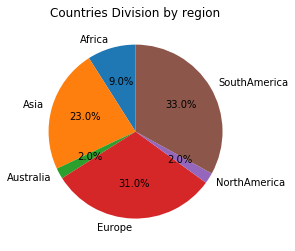

In [35]:
regions = prStatusByCounry['region'].unique()
group = prStatusByCounry.groupby("region")["prostitutionStatus"].count()
print(list(dict(group).keys()))
print(list(dict(group).values()))
plt.pie(list(dict(group).values()), labels=list(dict(group).keys()), startangle=90, autopct='%.1f%%')
plt.title('Countries Division by region')
plt.show()

In [36]:
unReg = list(dict(group).keys())
prType = dict()
for i in unReg:
    typesInReg = []
    for j in range(len(prStatusByCounry.region)):
        if prStatusByCounry.region[j] == i:
            typesInReg.append(prStatusByCounry.prostitutionStatus[j])
    prType[i] = typesInReg
print(prType)

{'Africa': ['1', '1', '3', '6', '1', '1', '2', '1', '2'], 'Asia': ['1', '1', '1', '1', '1', '6', '3', '6', '1', '1', '3', '1', '1', '3', '3', '4', '1', '1', '6', '2', '1', '1', '1'], 'Australia': ['6', '5'], 'Europe': ['1', '2', '3', '3', '1', '3', '3', '3', '3', '4', '2', '2', '2', '4', '4', '3', '2', '1', '2', '3', '2', '1', '3', '3', '1', '3', '3', '1', '1', '4', '3'], 'NorthAmerica': ['4', '1'], 'SouthAmerica': ['1', '6', '2', '1', '4', '2', '3', '2', '2', '3', '3', '1', '3', '2', '6', '1', '3', '1', '1', '3', '1', '6', '3', '2', '3', '2', '1', '1', '1', '3', '1', '2', '2']}


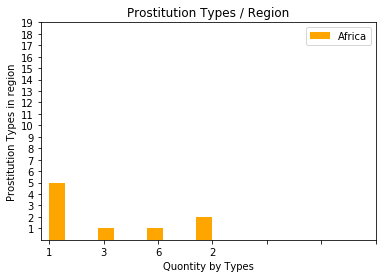

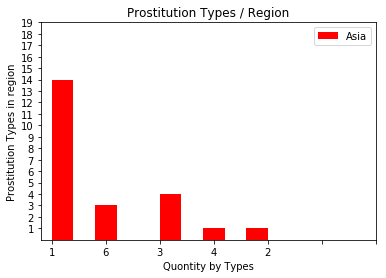

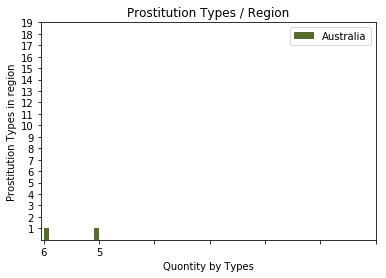

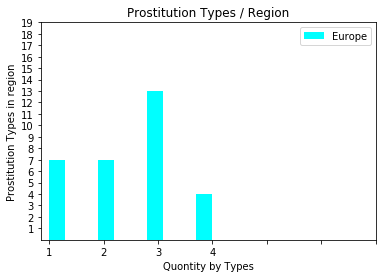

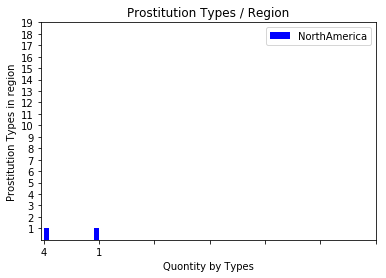

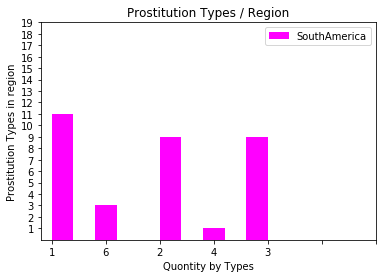

In [37]:
cols = ['orange', "red", 'darkolivegreen', 'aqua', 'blue', "magenta"]
a = 0
for i in list(prType.keys()): 
    score_pk = prType[i]
    plt.hist([score_pk], color=cols[a])
    plt.xlabel("Prostitution Types in region")
    plt.ylabel("Quontity by Types")
    legend = [i]
    plt.legend(legend)
    plt.xticks(range(0, 7))
    plt.yticks(range(1, 20))
    plt.title('Prostitution Types / Region')
    a+=1
    plt.show()

In [38]:
unReg = list(dict(group).keys())
prType = dict()
for i in unReg:
    typesInReg = []
    for j in range(len(prStatusByCounry.region)):
        if prStatusByCounry.region[j] == i:
            typesInReg.append(prStatusByCounry.prostitutesPer10K[j])
    prType[i] = typesInReg
print(prType)

{'Africa': ['12', '2', '2', '27', '2', '10', '14', '4', '13'], 'Asia': ['4', '17', '78', '22', '23', 'None', '5', '9', '11', 'None', '15', 'None', 'None', '12', '7', '6', '15', 'None', 'None', '24', '22', '7', 'None'], 'Australia': ['9', '13'], 'Europe': ['60', '34', '23', '14', '50', '12', '11', '7', '7', '5', '37', '11', '24', 'None', '2', '10', '150', '6', '5', 'None', '15', '10', '5', '27', '80', '40', '140', '148', '39', '3', '11'], 'NorthAmerica': ['None', '31'], 'SouthAmerica': ['75', '18', '9', 'None', 'None', '29', '26', 'None', '2', '31', '78', 'None', '75', '21', '32', 'None', '16', '69', '65', '25', '66', '19', '29', '13', '5', '21', 'None', 'None', 'None', '15', '32', '24', '150']}


In [39]:
score = []
a=0
for i in list(prType.keys()):
    tmp = []
    for j in prType[i]:
        if j == "None":
            continue
        tmp.append(int(j))
    score.append(sum(tmp) / len(tmp))
for i in range(len(score)):
    a +=1
    score[i] = [score[i]]
score    

[[9.555555555555555], [17.3125], [11.0], [34.0], [31.0], [37.8]]

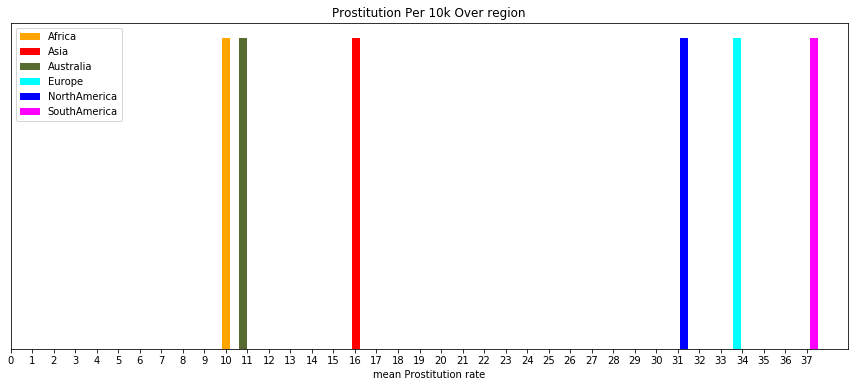

In [40]:
plt.figure(figsize=[15,6])
plt.hist(score, color=['orange', "red", 'darkolivegreen', 'aqua', 'blue', "magenta"])
plt.xlabel("mean Prostitution rate")
plt.ylabel("")
plt.legend(unReg)
plt.xticks(range(0, 38))
plt.yticks(range(1, 1))
plt.title('Prostitution Per 10k Over region')
plt.show()

['1', '2', '3', '4', '5', '6']
[38, 19, 27, 7, 1, 8]


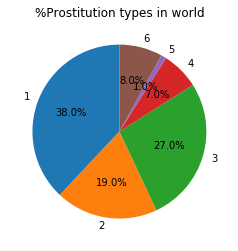

In [41]:
regions = prStatusByCounry['prostitutionStatus'].unique()
group = prStatusByCounry.groupby("prostitutionStatus")["prostitutesPer10K"].count()
unStatus = list(dict(group).keys())
vals = list(dict(group).values())
print(unStatus)
print(vals)
plt.pie(vals, labels=unStatus, startangle=90, autopct='%.1f%%')
plt.title('%Prostitution types in world')
plt.show()

In [42]:
pr10k = dict()
for i in unStatus:
    typesInReg = []
    for j in range(len(prStatusByCounry.prostitutionStatus)):
        if prStatusByCounry.prostitutionStatus[j] == i:
            typesInReg.append(prStatusByCounry.prostitutesPer10K[j])
    pr10k[i] = typesInReg
print(pr10k)
score = []
a=0
for i in list(pr10k.keys()):
    tmp = []
    for j in pr10k[i]:
        if j == "None":
            continue
        tmp.append(int(j))
    score.append(round(sum(tmp) / len(tmp), 2))
for i in range(len(score)):
    a +=1
    score[i] = [score[i]]    
print(score)


{'1': ['4', '60', '12', '75', '17', '78', 'None', '22', '23', '50', 'None', '2', 'None', '69', '65', '11', 'None', '66', 'None', 'None', '2', '6', '10', '15', '80', '10', 'None', 'None', 'None', 'None', '4', '148', '39', '22', '7', 'None', '32', '31'], '2': ['34', '9', '29', 'None', '2', '21', '37', '11', '24', '150', '5', '15', '13', '21', '14', '24', '13', '24', '150'], '3': ['23', '26', '14', '31', '78', '12', '11', '75', '7', '2', '7', '16', '25', '5', '15', '10', '12', '7', 'None', '29', '5', '5', '27', '40', '140', '15', '11'], '4': ['None', 'None', '5', 'None', '2', '6', '3'], '5': ['13'], '6': ['18', '9', 'None', '32', '9', '27', '19', 'None']}
[[35.56], [33.11], [24.92], [4.0], [13.0], [19.0]]


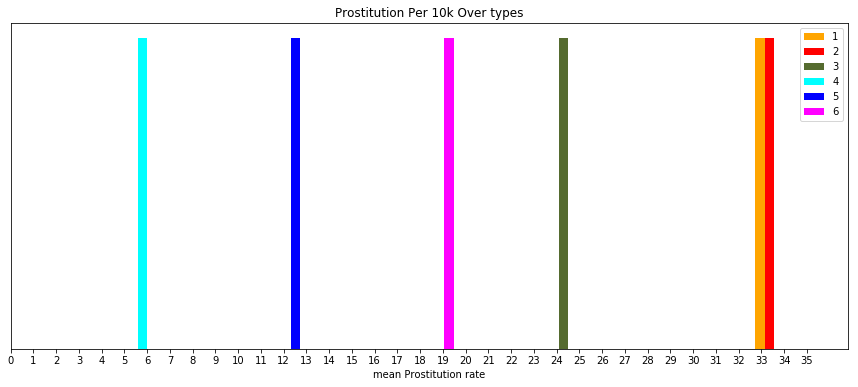

In [43]:
plt.figure(figsize=[15,6])
plt.hist(score, color=['orange', "red", 'darkolivegreen', 'aqua', 'blue', "magenta"])
plt.xlabel("mean Prostitution rate")
plt.ylabel("")
plt.legend(unStatus)
plt.xticks(range(0, 36))
plt.yticks(range(1, 1))
plt.title('Prostitution Per 10k Over types')
plt.show()

In [44]:

gdpD = dict()
literacyD = dict()
pplGrowthD = dict()
agricultureD = dict()
hpiD = dict()

for i in unStatus:
    
    gdp= []
    literacy= []
    pplGrowth= []
    agriculture= []
    hpi= []

    for j in range(len(prStatusByCounry.prostitutionStatus)):
        if prStatusByCounry.prostitutionStatus[j] == i:
            gdp.append(prStatusByCounry.gdp[j])
            literacy.append(prStatusByCounry.literacy[j])
            pplGrowth.append(prStatusByCounry.pplGrowth[j])
            agriculture.append(prStatusByCounry.agriculture[j])
            hpi.append(prStatusByCounry.hpi[j])
            
    gdpD[i] = gdp
    literacyD[i] = literacy
    pplGrowthD[i] = pplGrowth
    agricultureD[i] = agriculture
    hpiD[i] =  hpi


[[10489.13], [14773.79], [12370.37], [22357.14], [21600.0], [13539.5]]


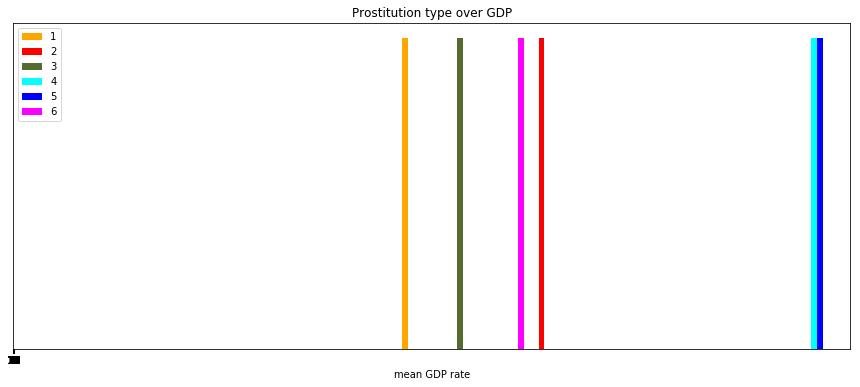

In [68]:
score1 = []
a=0
for i in list(gdpD.keys()):
    tmp = []
    for j in gdpD[i]:
        if j == "None":
            continue
        tmp.append(int(j))
    score1.append(round(sum(tmp) / len(tmp), 2))
for i in range(len(score1)):
    a +=1
    score1[i] = [score1[i]]    
print(score1)

plt.figure(figsize=[15,6])
plt.hist(score1, color=['orange', "red", 'darkolivegreen', 'aqua', 'blue', "magenta"])
plt.xlabel("mean GDP rate")
plt.ylabel("")
plt.legend(unStatus)
plt.xticks(range(0, 36))
plt.yticks(range(1, 1))
plt.title('Prostitution type over GDP')
plt.show()

[[82.3], [91.04], [89.55], [98.14], [99.0], [91.81]]


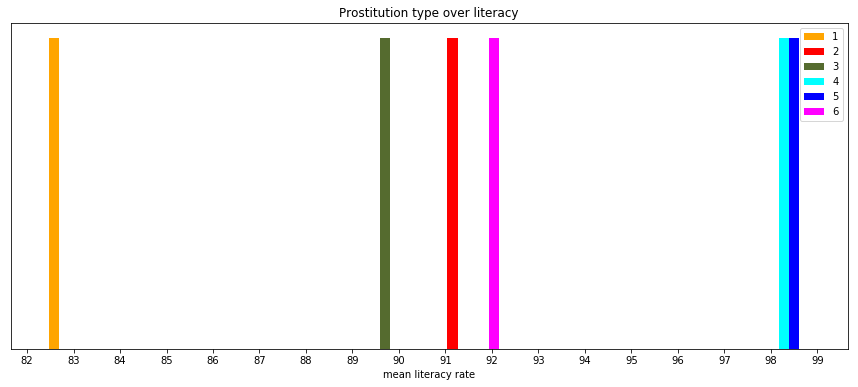

In [71]:
from math import isnan
score2 = []
a=0
for i in list(literacyD.keys()):
    tmp = []
    for j in literacyD[i]:
        if j == "None" or (i == "3" and literacyD[i].index(j) == 23):
            continue
        tmp.append(float(j))
    score2.append(round(sum(tmp) / len(tmp), 2))
for i in range(len(score2)):
    a +=1
    score2[i] = [score2[i]]    
print(score2)

plt.figure(figsize=[15,6])
plt.hist(score2, color=['orange', "red", 'darkolivegreen', 'aqua', 'blue', "magenta"])
plt.xlabel("mean literacy rate")
plt.ylabel("")
plt.legend(unStatus)
plt.xticks(range(82, 100))
plt.yticks(range(1, 1))
plt.title('Prostitution type over literacy')
plt.show()

[[11.13], [9.12], [8.19], [6.71], [6.0], [12.71]]


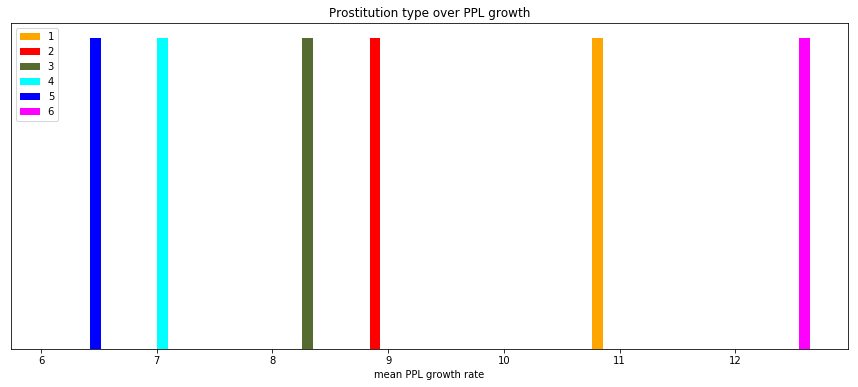

In [74]:
from math import isnan
score3 = []
a=0
for i in list(pplGrowthD.keys()):
    tmp = []
    for j in pplGrowthD[i]:
        if j == "None" :
            continue
        tmp.append(float(j))
    score3.append(round(sum(tmp) / len(tmp), 2))
for i in range(len(score2)):
    a +=1
    score3[i] = [score3[i]]    
print(score3)

plt.figure(figsize=[15,6])
plt.hist(score3, color=['orange', "red", 'darkolivegreen', 'aqua', 'blue', "magenta"])
plt.xlabel("mean PPL growth rate")
plt.ylabel("")
plt.legend(unStatus)
plt.xticks(range(6, 13))
plt.yticks(range(1, 1))
plt.title('Prostitution type over PPL growth')
plt.show()

[[15.0], [8.0], [10.0], [6.0], [4.0], [7.000000000000001]]


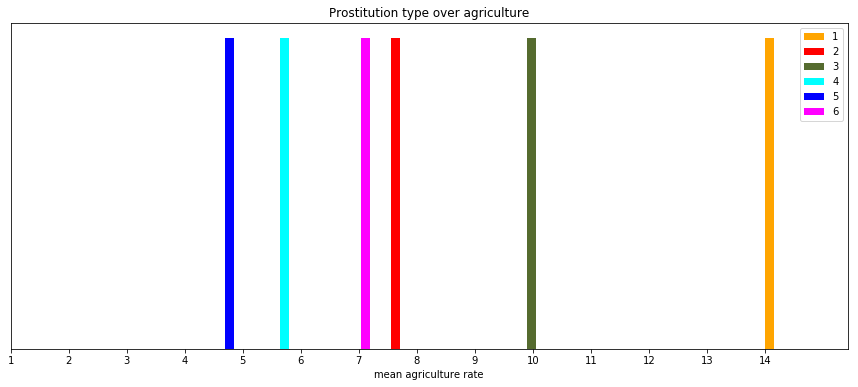

In [83]:

score4 = []
a=0
for i in list(agricultureD.keys()):
    tmp = []
    for j in agricultureD[i]:
        if j == "None" :
            continue
        tmp.append(float(j))
    score4.append(round(sum(tmp) / len(tmp), 2))
for i in range(len(score4)):
    a +=1
    score4[i] = [score4[i] * 100]    
print(score4)

plt.figure(figsize=[15,6])
plt.hist(score4, color=['orange', "red", 'darkolivegreen', 'aqua', 'blue', "magenta"])
plt.xlabel("mean agriculture rate")
plt.ylabel("")
plt.legend(unStatus)
plt.xticks(range(1, 15))
plt.yticks(range(1, 1))
plt.title('Prostitution type over agriculture')
plt.show()

[[30.59], [32.22], [31.72], [29.55], [31.26], [42.15]]


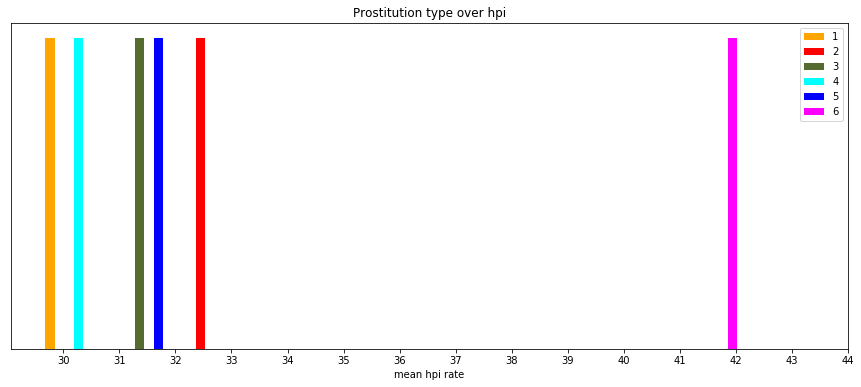

In [88]:
score5 = []
a=0
for i in list(hpiD.keys()):
    tmp = []
    for j in hpiD[i]:
        if j == "None" :
            continue
        tmp.append(float(j))
    score5.append(round(sum(tmp) / len(tmp), 2))
for i in range(len(score5)):
    a +=1
    score5[i] = [score5[i] ]    
print(score5)

plt.figure(figsize=[15,6])
plt.hist(score5, color=['orange', "red", 'darkolivegreen', 'aqua', 'blue', "magenta"])
plt.xlabel("mean hpi rate")
plt.ylabel("")
plt.legend(unStatus)
plt.xticks(range(30, 45))
plt.yticks(range(1, 1))
plt.title('Prostitution type over hpi')
plt.show()

In [127]:

df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()

for j in range(len(prStatusByCounry.prostitutesPer10K)):
    if prStatusByCounry.prostitutesPer10K[j] == "None":
        continue
    if int(prStatusByCounry.prostitutesPer10K[j]) <= 15:
        df1 = df1.append(prStatusByCounry.iloc[[j]])
    if 30 >= int(prStatusByCounry.prostitutesPer10K[j]) > 15:
        df2 = df2.append(prStatusByCounry.iloc[[j]])
    if int(prStatusByCounry.prostitutesPer10K[j]) > 30:
        df3 = df3.append(prStatusByCounry.iloc[[j]])

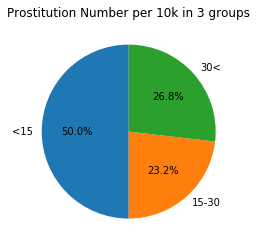

In [137]:
plt.pie([len(df1.country), len(df2.country), len(df3.country)], labels=["<15", "15-30", "30<"], startangle=90, autopct='%.1f%%')
plt.title('Prostitution Number per 10k in 3 groups')
plt.show()

In [192]:
gdp= []
literacy= []
pplGrowth= []
agriculture= []
hpi= []

def work(df):
    gdp.clear()
    literacy.clear()
    agriculture.clear()
    pplGrowth.clear()
    hpi.clear()
    for a in df.gdp:
        if a != "None":
            gdp.append(round(int(a)))
    for b in df.literacy:
        if b != "None" and ( list(df.literacy).index(b) != 15):
            literacy.append(round(float(b)))
    for c in df.pplGrowth:
        if c != "None":
            pplGrowth.append(round(float(c)))
    for d in df.agriculture:
        if d != "None":
            agriculture.append(round(float(d)))
    for i in df.hpi:
        if i != "None":
            hpi.append(round(float(i)))
        
work(df1)


In [193]:
gdpmeans = []
literacymeans = []
pplGrowthmeans = []
agriculturemeans =[]
hpimeans =[]

def collectMeans(df):
    work(df)
    gdpmeans.append(round(sum(gdp)/len(gdp), 2))
    literacymeans.append(round(sum(literacy)/len(literacy), 2))
    pplGrowthmeans.append(round(sum(pplGrowth)/len(pplGrowth), 2))
    agriculturemeans.append(round(sum(agriculture)/len(agriculture), 2))
    hpimeans.append(round(sum(hpi)/len(hpi), 2))
    
collectMeans(df1)    
collectMeans(df2)
collectMeans(df3)   

In [194]:
print(gdpmeans)
print(literacymeans)
print(pplGrowthmeans)
print(agriculturemeans)
print(hpimeans)

    

[14326.88, 9412.95, 12511.05]
[86.23, 87.88, 90.62]
[9.63, 11.26, 7.32]
[0.03, 0.0, 0.0]
[28.73, 35.95, 32.76]


In [195]:
  def barplot(x_data, y_data, x_label="", y_label="", title=""):
    _, ax = plt.subplots()
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    #ax.errorbar(x_data, y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

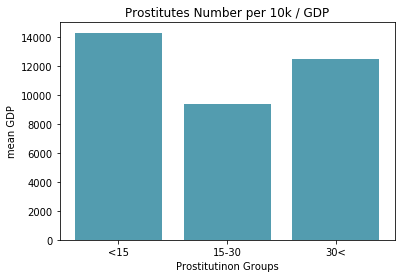

In [196]:
unNum = ["<15", "15-30", "30<"]
barplot(unNum, gdpmeans, "Prostitutinon Groups", "mean GDP","Prostitutes Number per 10k / GDP")


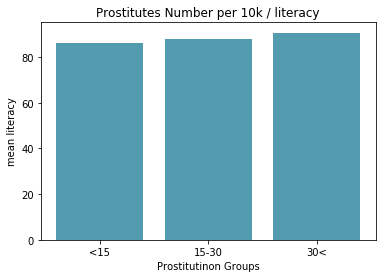

In [197]:
barplot(unNum, literacymeans, "Prostitutinon Groups", "mean literacy","Prostitutes Number per 10k / literacy")

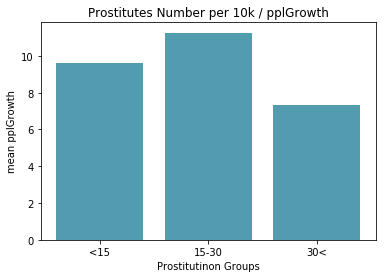

In [198]:
barplot(unNum, pplGrowthmeans, "Prostitutinon Groups", "mean pplGrowth","Prostitutes Number per 10k / pplGrowth")

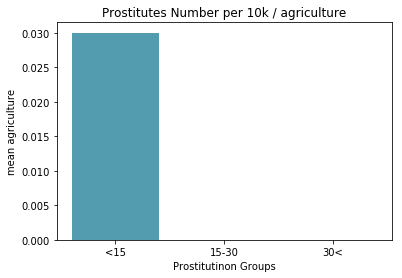

In [199]:
barplot(unNum, agriculturemeans, "Prostitutinon Groups", "mean agriculture","Prostitutes Number per 10k / agriculture")

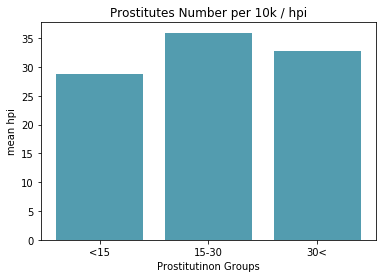

In [200]:
barplot(unNum, hpimeans, "Prostitutinon Groups", "mean hpi","Prostitutes Number per 10k / hpi")